In [6]:
import tensorflow as tf
tf.enable_eager_execution()



In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.datasets import mnist 


In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

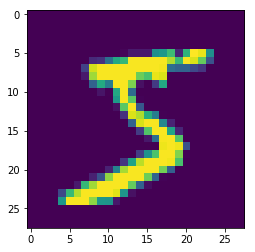

In [10]:
plt.imshow(X_train[0])

In [11]:
only_zeros = X_train[y_train==0]

In [12]:
only_zeros.shape

(5923, 28, 28)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [14]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28,28)))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))



In [16]:
GAN = Sequential([generator, discriminator])

In [17]:
discriminator.trainable = False 


In [18]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')



In [19]:
batch_size = 32
#my_data = X_train
my_data = only_zeros 

In [20]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [21]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [22]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [23]:
epochs = 1

In [24]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print("Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE") 
    

Currently on Epoch {epoch+1}
Instructions for updating:
Use tf.cast instead.
TRAINING COMPLETE


In [25]:
noise = tf.random.normal(shape=[10,codings_size])

In [26]:
noise.shape

TensorShape([Dimension(10), Dimension(100)])

In [27]:
images = generator(noise)

In [28]:
images.shape

TensorShape([Dimension(10), Dimension(28), Dimension(28)])

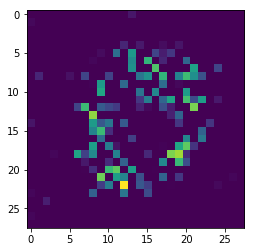

In [30]:
plt.imshow(images[0])